In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import json

In [ ]:
# load the JSON dataset
with open('/content/drive/MyDrive/OSNA/user_data.json', 'r') as file:
    user_data = json.load(file)

# initializing a directed graph
G = nx.DiGraph()

# adding nodes and edges
for user in user_data:
    G.add_node(user['id'], username=user['username'])  # adding user as node
    for following_id in user['following']:  # add edges to represent "following" relationships
        G.add_edge(user['id'], following_id)

In [ ]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 2110
Number of edges: 2126


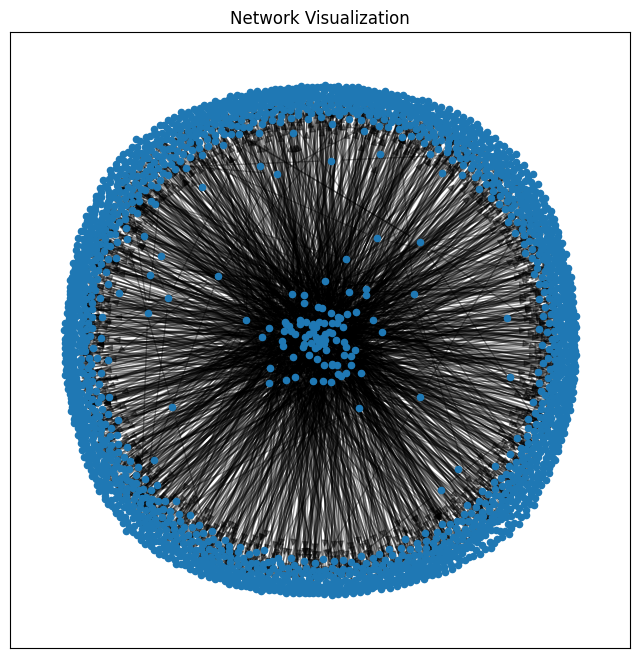

In [ ]:
# abstract visualization of the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=20)

# edges
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.title('Network Visualization')
plt.show()

In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.0 MB/s eta 0:00:00


In [ ]:
# visualizing an graph through pyvis lib
from pyvis.network import Network

# initializing the network
net = Network(notebook=True, height="500px", width="60%", cdn_resources='remote')

# adding nodes and edges from the NetworkX graph
net.from_nx(G)

# save the interactive graph as an HTML file for better viewing
net.show("network.html")

network.html


##Measure 1 - Degree Distribution

Measures the number of connections (edges) each node has in the network.
It can be used to understand the connectivity pattern within the network, identifying hubs or nodes with many connections.

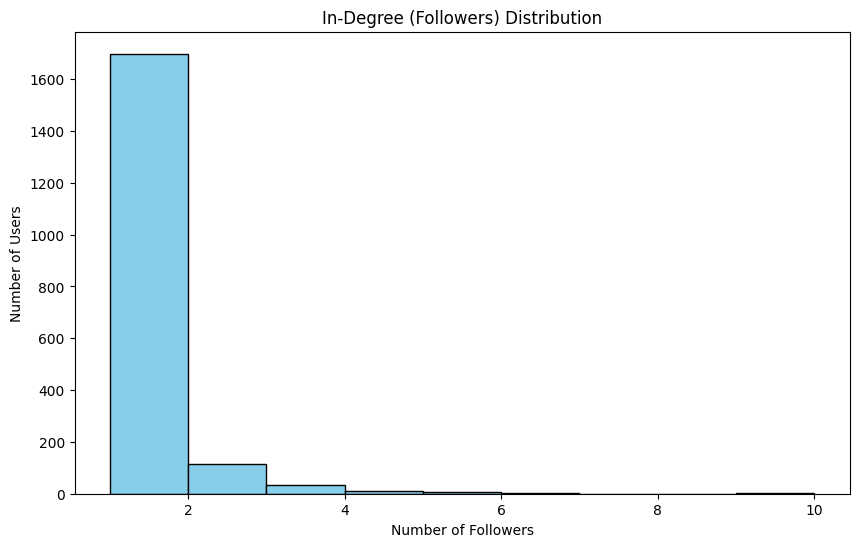

In [ ]:
# measure 1 - degree distribution
import matplotlib.pyplot as plt

# calculating the in-degree and out-degree for each node
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

# plot the in-degree distribution (Followers)
plt.figure(figsize=(10, 6))
plt.hist(in_degrees, bins=range(1, max(in_degrees)+1), color='skyblue', edgecolor='black')
plt.title('In-Degree (Followers) Distribution')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Users')
plt.show()

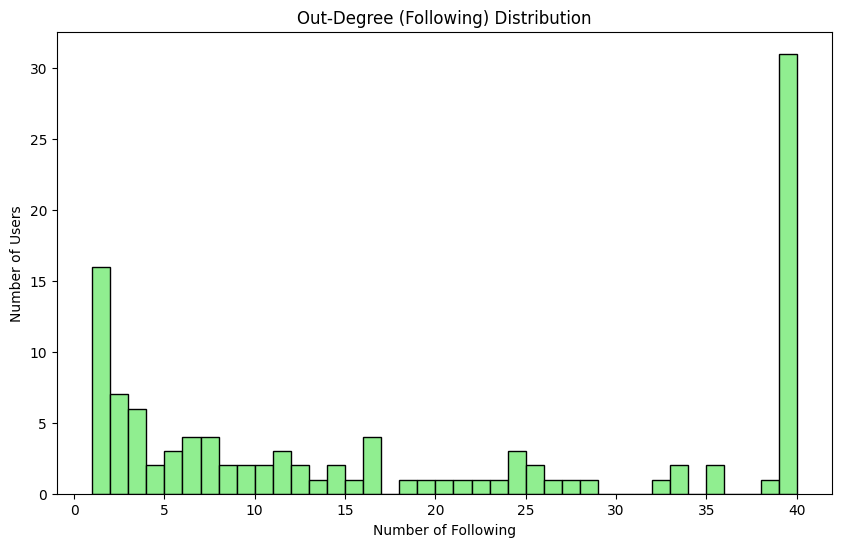

In [ ]:
# plot the out-degree distribution (Following)
plt.figure(figsize=(10, 6))
plt.hist(out_degrees, bins=range(1, max(out_degrees)+1), color='lightgreen', edgecolor='black')
plt.title('Out-Degree (Following) Distribution')
plt.xlabel('Number of Following')
plt.ylabel('Number of Users')
plt.show()

##PageRank

An algorithm that ranks nodes in a graph based on the number and quality of edges connected to them. It helps to identify the most influential or important nodes within the network.

In [ ]:
# measure 2 - page rank
pagerank_values = nx.pagerank(G)

# sorting nodes by PageRank in descending order and getting the top 5
top_pagerank_nodes = sorted(pagerank_values.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by PageRank (User ID, PageRank):")
for user_id, pagerank in top_pagerank_nodes:
    print(user_id, pagerank)

Top 5 nodes by PageRank (User ID, PageRank):
109330588364093723 0.0010511057239770989
110266162634306901 0.0008831145187431072
109303680880410212 0.0008595349991934034
106919732872456302 0.0008381645597753019
110661248329771293 0.0008381645597753019


In [ ]:
!pip install Mastodon.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
from mastodon import Mastodon

# analyzing the page rank measure
from mastodon import Mastodon
mastodon = Mastodon(
    access_token='pytooter_usercred.secret',
    api_base_url='https://mastodon.social'
)

user_ids = [
    109330588364093723,
    110266162634306901,
    109303680880410212,
    106919732872456302,
    110661248329771293
]

for user_id in user_ids:
    user = mastodon.account(user_id)
    print(f"User ID: {user_id}, Username: @{user['username']}, Display Name: {user['display_name']}, URL: {user['url']}")

User ID: 109330588364093723, Username: @kuxaruk, Display Name: Роман КУХАРУК, URL: https://mastodon.social/@kuxaruk
User ID: 110266162634306901, Username: @arstechnica, Display Name: Ars Technica, URL: https://mastodon.social/@arstechnica
User ID: 109303680880410212, Username: @politiyacht, Display Name: Politiyacht, URL: https://mastodon.social/@politiyacht
User ID: 106919732872456302, Username: @neodb, Display Name: NeoDB 联邦宇宙书影音播客游戏标注平台🔖, URL: https://mastodon.social/@neodb
User ID: 110661248329771293, Username: @furrgroup, Display Name: Sour Lemonade, URL: https://mastodon.social/@furrgroup


##Betweenness Centrality

It is the measure of the number of times a node lies on the shortest path between other nodes. It is used to find nodes that serve as bridges within the network, controlling information flow.

In [ ]:
#measure 4 - betweenness
import networkx as nx

# calculating betweenness centrality for the network
betweenness_centrality = nx.betweenness_centrality(G)

# sorting nodes by betweenness centrality and getting the top 5
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Betweenness Centrality (User ID, Betweenness):")
for user_id, betweenness in top_betweenness_nodes:
    print(user_id, betweenness)

Top 5 nodes by Betweenness Centrality (User ID, Betweenness):
109520768124043522 1.7994625005510854e-05
109603511199865642 1.4958032035830897e-05
110634684434293005 8.997312502755427e-06
109305863889828371 8.659913283902098e-06
111085519168942080 0.0


##Community Detection (Girvan-Newman Algorithm)

A method for identifying communities within a network by iteratively removing edges with the highest betweenness centrality. It can be used to discover the modular structure of a network, revealing groups of nodes more densely connected internally.

In [ ]:
!pip install python-louvain

In [ ]:
# measure 3 - community detection through Girvan–Newman algorithm

import networkx as nx
from networkx.algorithms import community
import json
import re
from collections import defaultdict

with open('/content/drive/MyDrive/OSNA/user_data.json', 'r') as file:
    user_data = json.load(file)

# Girvan-Newman community detection method
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))

# extracting hashtags and mapping them to users
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

user_id_to_hashtags = defaultdict(list)
for user in user_data:
    user_id = user['id']
    hashtags = extract_hashtags(user['note'])
    user_id_to_hashtags[user_id].extend(hashtags)

# aggregating hashtags for each community
community_hashtags = defaultdict(set)
for i, community in enumerate(communities):
    for user_id in community:
        hashtags = user_id_to_hashtags.get(user_id, [])
        community_hashtags[i].update(hashtags)

# printing communities identified by common hashtags
for community_id, hashtags in community_hashtags.items():
    print(f"Community {community_id} common hashtags: {', '.join(hashtags)}")


Community 0 common hashtags: 39
Community 1 common hashtags: 
Community 2 common hashtags: 
Community 3 common hashtags: 
Community 4 common hashtags: 
Community 5 common hashtags: 39
Community 6 common hashtags: 
Community 7 common hashtags: 
Community 8 common hashtags: 
Community 9 common hashtags: 
Community 10 common hashtags: 
Community 11 common hashtags: 
Community 12 common hashtags: 
Community 13 common hashtags: 
Community 14 common hashtags: 
Community 15 common hashtags: 
Community 16 common hashtags: 
Community 17 common hashtags: 
Community 18 common hashtags: 
Community 19 common hashtags: 
Community 20 common hashtags: 
Community 21 common hashtags: 
Community 22 common hashtags: 
Community 23 common hashtags: 
Community 24 common hashtags: 
Community 25 common hashtags: 
Community 26 common hashtags: 
Community 27 common hashtags: 
Community 28 common hashtags: 
Community 29 common hashtags: 
Community 30 common hashtags: 
Community 31 common hashtags: 
Community 32 c

##Clustering Coefficient

It Measures the degree to which nodes in a graph tend to cluster together. It indicates how nodes are embedded in their neighborhoods, identifying tightly-knit groups or communities.

In [ ]:
#measure 5 - clustering coefficient

# calculating the average clustering coefficient for the network
avg_clustering_coefficient = nx.average_clustering(G)

print(f"Average Clustering Coefficient: {avg_clustering_coefficient}")

Average Clustering Coefficient: 0.00015952468797686067


In [ ]:
# calculating the clustering coefficient for all nodes
clustering_coefficients = nx.clustering(G)

# sorting nodes by clustering coefficient and getting the top 5
top_clustering_nodes = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Clustering Coefficient (User ID, Clustering Coefficient):")
for user_id, clustering in top_clustering_nodes:
    print(user_id, clustering)

Top 5 nodes by Clustering Coefficient (User ID, Clustering Coefficient):
108197686686621737 0.16666666666666666
1372518 0.16666666666666666
111897225966064127 0.001422475106685633
109603511199865642 0.0012315270935960591
109305863889828371 0.0006097560975609756


In [ ]:
# visualizing the measures through interactive graph
from pyvis.network import Network
import networkx as nx
import json

betweenness = nx.betweenness_centrality(G)
clustering = nx.clustering(G)

with open('/content/drive/MyDrive/OSNA/user_data.json', 'r') as file:
    user_data = json.load(file)
user_id_to_username = {user['id']: user['username'] for user in user_data}

net = Network(notebook=True, height="500px", width="60%")

for node in G.nodes():
    node_attr = G.nodes[node]
    # color based on betweenness centrality
    color = 'red' if node_attr['betweenness'] > 1.0e-5 else 'green'
    # size based on clustering coefficient
    size = 20 if node_attr['clustering'] > 0.1 else 10
    title = f"Betweenness: {node_attr['betweenness']}, Clustering: {node_attr['clustering']}"
    net.add_node(node, title=title, color=color, size=size)

# adding edges to the network
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# saving the network
net.show("network.html")

network.html
